In [1]:
import pandas
import datetime
import numpy
import multiprocessing

import rt
import rt_sct_utils
import plot_utils

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.dates import date2num, DateFormatter

import time

In [2]:
cpu_count = multiprocessing.cpu_count()
# radar params
sTime = datetime.datetime(2018,2,6,18)#datetime.datetime(2010,10,13)
eTime = datetime.datetime(2018,2,6,21)#datetime.datetime(2010,10,14)
date_plot = datetime.datetime(2018,2,6, 20)#datetime.datetime(2010,10,13,20)
radar = 'cvw'
sel_beam = 11

In [3]:
start_time = time.time()
rto = rt.RtRun(start_time=sTime, end_time=eTime,\
               radar_code=radar, beam=sel_beam,\
               out_dir='/tmp/', nprocs=cpu_count,\
              nhops=2,freq=12)
print("--- %s seconds ---" % (time.time() - start_time))

--- 162.09124851226807 seconds ---


In [4]:
rto.read_rays()
rdict = rto.rays.paths
# rdict[date_plot][sel_beam][6.5].keys()

/tmp/rays.2018037_12.dat header: 
nhour      :: 4
nazim      :: 1
nelev      :: 551
tlat       :: 43.27000045776367
tlon       :: -120.36000061035156
saz        :: -21.6200008392334
eaz        :: -21.6200008392334
daz        :: 1.0
sel        :: 5.0
eel        :: 60.0
del        :: 0.10000000149011612
freq       :: 12.0
nhop       :: 2
year       :: 2018
mmdd       :: 206
shour      :: 43.0
ehour      :: 46.0
dhour      :: 1.0
hmf2       :: 0.0
nmf2       :: 0.0
fext       :: b'2018037_12'
outdir     :: b'None'
indir      :: b'/tmp/'


In [5]:
rto.read_edens()
edenstht = rto.ionos.edens[date_plot][sel_beam]['th']#dict_keys(['th', 'nel', 'dip'])
edensArr = rto.ionos.edens[date_plot][sel_beam]['nel']

/tmp/edens.2018037_12.dat header: 
nhour      :: 4
nazim      :: 1
nelev      :: 551
tlat       :: 43.27000045776367
tlon       :: -120.36000061035156
saz        :: -21.6200008392334
eaz        :: -21.6200008392334
daz        :: 1.0
sel        :: 5.0
eel        :: 60.0
del        :: 0.10000000149011612
freq       :: 12.0
nhop       :: 2
year       :: 2018
mmdd       :: 206
shour      :: 43.0
ehour      :: 46.0
dhour      :: 1.0
hmf2       :: 0.0
nmf2       :: 0.0
fext       :: b'2018037_12'
outdir     :: b'None'
indir      :: b'/tmp/'


In [6]:
rto.read_scatter()

/tmp/gscat.2018037_12.dat header: 
nhour      :: 4
nazim      :: 1
nelev      :: 551
tlat       :: 43.27000045776367
tlon       :: -120.36000061035156
saz        :: -21.6200008392334
eaz        :: -21.6200008392334
daz        :: 1.0
sel        :: 5.0
eel        :: 60.0
del        :: 0.10000000149011612
freq       :: 12.0
nhop       :: 2
year       :: 2018
mmdd       :: 206
shour      :: 43.0
ehour      :: 46.0
dhour      :: 1.0
hmf2       :: 0.0
nmf2       :: 0.0
fext       :: b'2018037_12'
outdir     :: b'None'
indir      :: b'/tmp/'
/tmp/iscat.2018037_12.dat header: 
nhour      :: 4
nazim      :: 1
nelev      :: 551
tlat       :: 43.27000045776367
tlon       :: -120.36000061035156
saz        :: -21.6200008392334
eaz        :: -21.6200008392334
daz        :: 1.0
sel        :: 5.0
eel        :: 60.0
del        :: 0.10000000149011612
freq       :: 12.0
nhop       :: 2
year       :: 2018
mmdd       :: 206
shour      :: 43.0
ehour      :: 46.0
dhour      :: 1.0
hmf2       :: 0.0
nmf2     

<ipython-input-7-282d806a27bf>: 4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


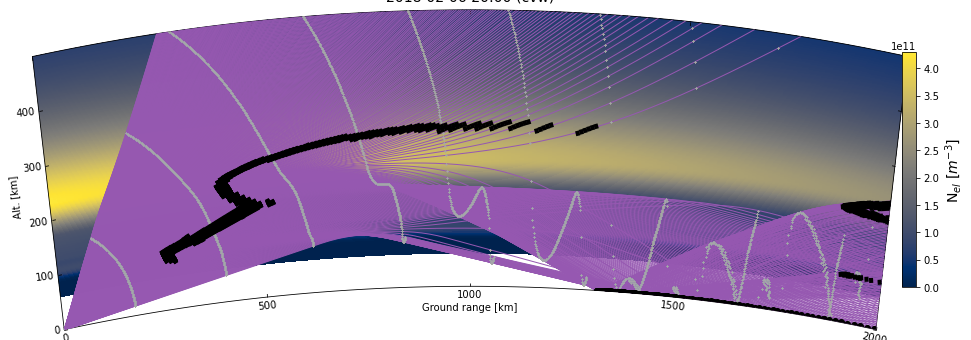

In [7]:
fig = plt.figure(figsize=(16, 6))
rays_obj = plot_utils.RayPathPlot()
X, Y = numpy.meshgrid(edenstht, rays_obj.ax1.Re + numpy.linspace(60,560,250))
im = rays_obj.aux_ax.pcolormesh(X, Y,  edensArr, cmap="cividis")
rays_obj.add_cbar(im)
_ = rays_obj.cbax.set_ylabel(r"N$_{el}$ [$m^{-3}$]", fontsize=14)
rays_obj.ax1.set_title(date_plot.strftime("%Y-%m-%d %H:%M") + " ("+radar+")", fontsize=14)
rays_obj.ax1.set_ylabel(r"Alt. [km]", size=16)
rays_obj.ax1.set_xlabel(r"Ground range [km]", size=16)

# plot rays
# plot rays
# for _el in rdict[date_plot][sel_beam].keys():
#     rays = rdict[date_plot][sel_beam][_el]
#     aax.plot(rays['th'], numpy.array(rays['r'])*1e-3, c='#9658B1', 
#                             zorder=8, linewidth=1.)
rays_obj.plot_rays(rdict, date_plot, sel_beam)
# plot rays
# plot rays

# Plot ranges
# Plot ranges
# range_markers = [0] + list(numpy.arange(180, 5000, 225))
# x, y = [], []


# for _el in rdict[date_plot][sel_beam].keys():
#     rays = rdict[date_plot][sel_beam][_el]
#     grans = numpy.array(rays['gran'])*1e-3
#     th = numpy.array(rays['th'])
#     r = numpy.array(rays['r'])
#     for rm in range_markers:
#         inds = (grans >= rm)
#         if inds.any():
#             x.append( th[inds][0] )
#             y.append( r[inds][0]*1e-3 )
#     aax.scatter(x, y, color="darkgray",s=0.25, zorder=9, alpha=0.4)
# Plot ranges
# Plot ranges

# Plot grnd.scat
# Plot grnd.scat
rays_obj.plot_scatter(rto, date_plot, sel_beam)
# for _el in rto.scatter.gsc[date_plot][sel_beam].keys():
#     gscat = rto.scatter.gsc[date_plot][sel_beam][_el]
#     if gscat is not None:
# #         print(gscat.keys())
#         aax.scatter(gscat['th'], ax.Re*numpy.ones(gscat['th'].shape), 
#                         color='k', zorder=10)
# Plot grnd.scat
# Plot grnd.scat

# Plot ion.scat
# Plot ion.scat

# for _el in rto.scatter.isc[date_plot][sel_beam].keys():
#     ionos = rto.scatter.isc[date_plot][sel_beam][_el]

#     if ionos['nstp'] <= 0:
#         continue
#     t = ionos['th']
#     r = ionos['r']*1e-3
#     spts = numpy.array([t, r]).T.reshape(-1, 1, 2)
#     h = ionos['h']*1e-3
#     rel = numpy.radians( ionos['rel'] )
#     r = numpy.sqrt( r**2 + h**2 + 2*r*h*numpy.sin( rel ) )
#     t = t + numpy.arcsin( h/r * numpy.cos( rel ) )
#     epts = numpy.array([t, r]).T.reshape(-1, 1, 2)
#     segments = numpy.concatenate([spts, epts], axis=1)
#     lcol = LineCollection( segments, zorder=10,linewidths=5. )
    
#     _ = lcol.set_color('k')
#     aax.add_collection( lcol )

# Plot ion.scat
# Plot ion.scat
# fig.savefig("iri_test.png", dpi=200, bbox_inches="tight")

In [8]:
sct_obj = rt_sct_utils.RT_SCT(rto)
gnd_df = sct_obj.get_gnd_sct_df()
# dict_keys(['r', 'th', 'gran', 'lat', 'lon', 'hops'])
iono_df = sct_obj.get_iono_sct_df()
# dict_keys(['nstp', 'r', 'th', 'gran', 'rel', 'w', 'nr', 'lat', 'lon', 'h', 'hops'])
#http://davit1.ece.vt.edu/doc/rt/rt_read_ranges-code.html

/home/bharat/anaconda3/envs/iri/lib/python3.8/site-packages/pandas/core/arraylike.py: 358: RuntimeWarning: divide by zero encountered in log10
/home/bharat/Documents/code/raydarn/rt_sct_utils.py: 207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/bharat/Documents/code/raydarn/rt_sct_utils.py: 207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/bharat/Documents/code/raydarn/rt_sct_utils.py: 207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [9]:
# gnd_df.groupby('hop').size()#[gnd_df['hop'] == 0.5]
print(iono_df.head())
print("-------------")
print(gnd_df.head())

                 date  lag_power  gates  range  azim  median_elev  hop  \
0 2018-02-06 18:00:00       -inf      1    180    11         -1.0 -1.0   
1 2018-02-06 18:00:00       -inf      2    225    11         -1.0 -1.0   
2 2018-02-06 18:00:00 -10.744653      3    270    11         21.7  0.5   
3 2018-02-06 18:00:00 -10.190800      4    315    11         21.7  0.5   
4 2018-02-06 18:00:00 -12.316588      5    360    11         21.7  0.5   

    median_alt   ref_ind         day  max_lag_power  
0    -1.000000 -1.000000  2018-02-06     109.270086  
1    -1.000000 -1.000000  2018-02-06     109.270086  
2  6461.064879  0.984170  2018-02-06     109.270086  
3  6476.930873  0.978604  2018-02-06     109.270086  
4  6484.741686  0.978220  2018-02-06     109.270086  
-------------
   lag_power  range  gate                date  azim  median_elev  median_alt  \
0       -inf    180     0 2018-02-06 18:00:00    11         -1.0        -1.0   
1       -inf    225     1 2018-02-06 18:00:00    11      

In [10]:
# prepare iono_df for plotting
# prepare iono_df for plotting
plot_param = "lag_power"
vmin=-30.
vmax=0.

iono_plot_df = iono_df[ ["date", "range",\
                        plot_param] ].pivot( "date", "range" )

iono_time_vals = iono_plot_df.index.values
iono_range_vals = iono_plot_df.columns.levels[1].values
iono_time_cntr, iono_rng_cntr  = numpy.meshgrid( iono_time_vals, iono_range_vals )
# Mask the nan values! pcolormesh can't handle them well!
iono_pwr_vals = numpy.ma.masked_where(\
                numpy.isnan(iono_plot_df[plot_param].values),\
                iono_plot_df[plot_param].values)
# prepare iono_df for plotting
# prepare iono_df for plotting

# prepare gnd_df for plotting
# prepare gnd_df for plotting
# sel_gnd_df = gnd_df[(gnd_df["median_alt"] > 1) & gnd_df["hop"] == 1]
# sel_gnd_df["median_alt"] = sel_gnd_df["median_alt"] - 6370.
gnd_plot_df = gnd_df[ ["date", "range",\
                        plot_param] ].pivot( "date", "range" )

gnd_time_vals = gnd_plot_df.index.values
gnd_range_vals = gnd_plot_df.columns.levels[1].values
gnd_time_cntr, gnd_rng_cntr  = numpy.meshgrid( gnd_time_vals, gnd_range_vals )
# Mask the nan values! pcolormesh can't handle them well!
gnd_pwr_vals = numpy.ma.masked_where(\
                numpy.isnan(gnd_plot_df[plot_param].values),\
                gnd_plot_df[plot_param].values)
# prepare gnd_df for plotting
# prepare gnd_df for plotting

<ipython-input-11-f7fd894bfbf5>: 6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
<ipython-input-11-f7fd894bfbf5>: 9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


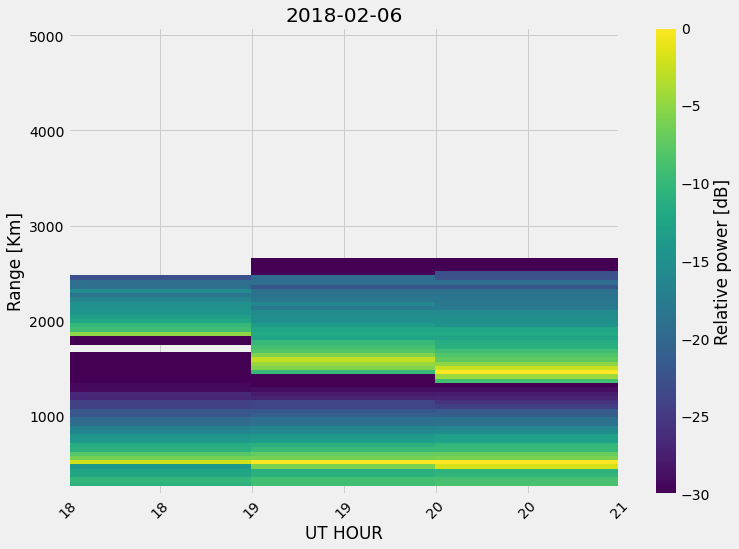

In [11]:
plt.style.use("fivethirtyeight")

fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111)

iono_rti_plot = ax.pcolormesh(iono_time_cntr.T , iono_rng_cntr.T, iono_pwr_vals,\
                        cmap="viridis", vmin=vmin,vmax=vmax)

gnd_rti_plot = ax.pcolormesh(gnd_time_cntr.T , gnd_rng_cntr.T, gnd_pwr_vals,\
                        cmap="viridis", vmin=vmin,vmax=vmax)

ax.get_xaxis().set_major_formatter(DateFormatter('%H'))

ax.set_ylabel("Range [Km]")
ax.set_xlabel("UT HOUR")
ax.set_title(date_plot.strftime("%Y-%m-%d"))

plt.xticks(rotation=45)
cb = fig.colorbar(gnd_rti_plot)
cb.set_label("Relative power [dB]")

ax.grid()


In [12]:
gnd_df[gnd_df["date"] >= sTime+datetime.timedelta(hours=13)]["date"].unique()

array([], dtype='datetime64[ns]')

In [13]:
sel_gnd_df = gnd_df[(gnd_df["median_alt"] > 1) & gnd_df["hop"] == 1]
sel_gnd_df["median_alt"] = sel_gnd_df["median_alt"] - 6370.
grp_gnd_df = sel_gnd_df.groupby(["date", "azim"]).min().reset_index()

<ipython-input-13-35d22e2422ef>: 2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


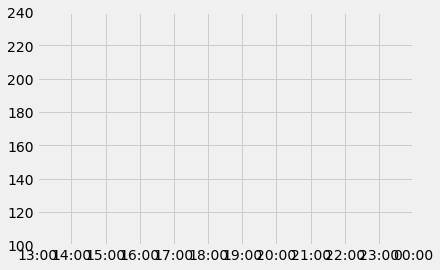

In [14]:
plt.style.use("fivethirtyeight")

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(grp_gnd_df["date"], grp_gnd_df["median_alt"])
ax.scatter(grp_gnd_df["date"], grp_gnd_df["median_alt"], s=100, c='r')

ax.set_xlim([datetime.datetime(2016,1,1,13), datetime.datetime(2016,1,2)])
ax.set_ylim([100,240])

ax.get_xaxis().set_major_formatter(DateFormatter('%H:%M'))

In [15]:
grp_gnd_df

,date,azim,lag_power,range,gate,median_elev,median_alt,hop,ref_ind,day,max_lag_power
0,2018-02-06 18:00:00,11,-22.526754,1845,37,10.900000,166.140250,1.0,0.936945,2018-02-06,1.208125e-17
1,2018-02-06 19:00:00,11,-22.008229,1440,28,6.245455,95.624227,1.0,0.923264,2018-02-06,1.208125e-17
2,2018-02-06 20:00:00,11,-22.652793,1350,26,6.883333,95.519000,1.0,0.921669,2018-02-06,1.208125e-17
3,2018-02-06 21:00:00,11,-22.483104,1350,26,7.150000,95.933875,1.0,0.922396,2018-02-06,1.208125e-17
